In [25]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


## Generating and visualizing dataset 


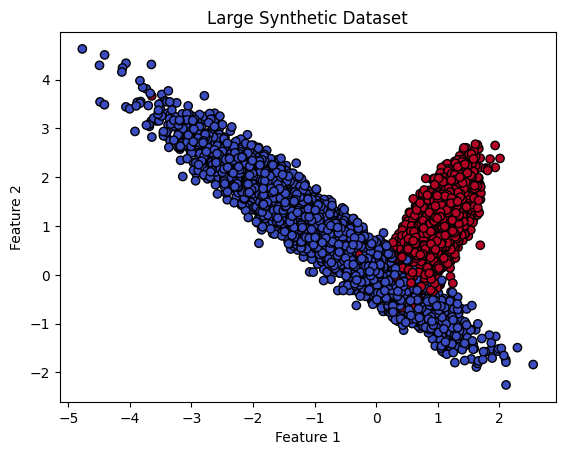

In [26]:
X, y = make_classification(
    n_samples=10000,  
    n_features=2,    
    n_informative=2, 
    n_redundant=0,   
    n_clusters_per_class=1,  
    random_state=42  
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Large Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Generating a synthetic dataset with 10,000 samples and 2 features using make_classification.

Ensuring the data has 2 informative features (Feature 1 and Feature 2) that determine class labels (y).

Visualizing the dataset using a scatter plot, where different colors represent the two classes.

## Defining the perceptron class

In [27]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        linear_output = np.dot(self.weights, x) + self.bias
        return self.activation_function(linear_output)

    def fit(self, X, y):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch + 1}/{self.epochs}")
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

                print(f"Sample {i}: Weights: {self.weights}, Bias: {self.bias}, Error: {error}")

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            prediction = self.predict(X[i])
            if prediction == y[i]:
                correct += 1
        accuracy = correct / len(X)
        return accuracy


Key attributes:
weights: Initialized to zeros, updated during training.

bias: A value added to the linear combination of inputs, also updated during training.

learning_rate: Controls the size of weight and bias updates.

epochs: Number of times the perceptron iterates over the entire dataset.

Key methods:
activation_function: A simple step function that returns 1 if the input is positive, otherwise 0.

predict: Calculates the weighted sum of inputs and applies the activation function to make predictions.

fit: Trains the perceptron by updating weights and bias for each sample in the dataset.

evaluate: Calculates the accuracy of the perceptron on the dataset.

## Training the percpetron model

In [28]:
perceptron = Perceptron(input_size=X.shape[1], learning_rate=0.1, epochs=5)

print("\nTraining the Perceptron:")
perceptron.fit(X, y)



Training the Perceptron:
Epoch 1/5
Sample 0: Weights: [-0.02047603  0.03576654], Bias: -0.1, Error: -1
Sample 1: Weights: [-0.02047603  0.03576654], Bias: -0.1, Error: 0
Sample 2: Weights: [0.03595903 0.08249856], Bias: 0.0, Error: 1
Sample 3: Weights: [0.03595903 0.08249856], Bias: 0.0, Error: 0
Sample 4: Weights: [0.03595903 0.08249856], Bias: 0.0, Error: 0
Sample 5: Weights: [0.03595903 0.08249856], Bias: 0.0, Error: 0
Sample 6: Weights: [ 0.25086555 -0.14894391], Bias: -0.1, Error: -1
Sample 7: Weights: [ 0.25086555 -0.14894391], Bias: -0.1, Error: 0
Sample 8: Weights: [ 0.20130403 -0.07811109], Bias: -0.2, Error: -1
Sample 9: Weights: [ 0.20130403 -0.07811109], Bias: -0.2, Error: 0
Sample 10: Weights: [ 0.20130403 -0.07811109], Bias: -0.2, Error: 0
Sample 11: Weights: [0.31344819 0.07737725], Bias: -0.1, Error: 1
Sample 12: Weights: [0.31344819 0.07737725], Bias: -0.1, Error: 0
Sample 13: Weights: [0.31344819 0.07737725], Bias: -0.1, Error: 0
Sample 14: Weights: [0.31344819 0.077


Initializing the perceptron model with:

input_size: Number of features in the dataset (2 in this case).

learning_rate: 0.1, which determines the step size for weight updates.

epochs: 5, meaning the perceptron will iterate over the dataset 5 times.

Training the perceptron using the fit method:

Calculating the error between the predicted and actual label.

Updating the weights and bias based on the error.

Printing the weights, bias, and error for every samp

## Evaluation of the perceptron model

In [29]:
accuracy = perceptron.evaluate(X, y)
print(f"\nPerceptron Accuracy on Large Dataset: {accuracy * 100:.2f}%")



Perceptron Accuracy on Large Dataset: 97.64%


## Visualization of decision boundry

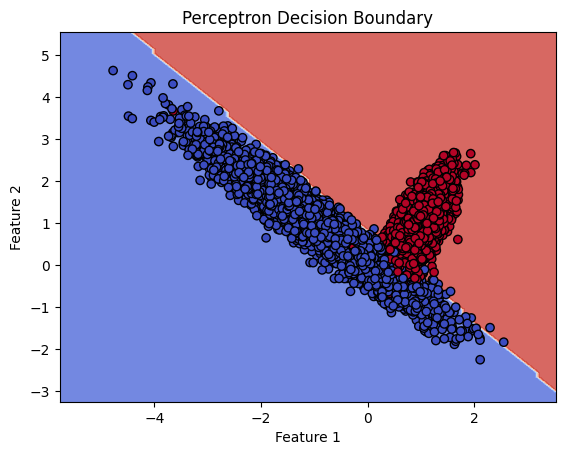

In [30]:
def plot_decision_boundary(perceptron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = np.array([perceptron.predict(x) for x in grid])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
plot_decision_boundary(perceptron, X, y)


The line or region that separates the two classes in the feature space is called the decision boundry.

Creating a mesh grid of points covering the feature space.

Predicting the class label for each point in the grid using the trained perceptron.

Plotted the grid with different colors for different predicted classes (the decision boundary).

Overlaying the original dataset points to show how well the perceptron separates the classes.



## Dataset


In [31]:
print("First 20 samples (features):\n", X[:20])
print("First 20 labels:\n", y[:20])
print(f"Dataset shape: {X.shape}")


First 20 samples (features):
 [[ 0.20476032 -0.35766544]
 [-1.38119698  1.39004105]
 [ 0.56435067  0.46732012]
 [ 1.13043626  0.49678781]
 [ 0.23064728 -0.34490219]
 [ 1.35817171  1.43657522]
 [-2.14906518  2.31442468]
 [ 1.08562381  1.0161111 ]
 [ 0.49561522 -0.70832818]
 [-0.44352238  0.75912289]
 [-2.7903014   2.24310676]
 [ 1.12144154  1.55488341]
 [ 0.0427259   0.31324352]
 [ 0.8738603   1.12103159]
 [-2.40524504  2.33351919]
 [-0.4072253   0.33741406]
 [ 0.87326535  0.8282366 ]
 [ 1.87535915 -1.51730902]
 [-0.88237571  0.4106461 ]
 [-0.82128014  0.74200753]]
First 20 labels:
 [0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0]
Dataset shape: (10000, 2)


Prints first 20 samples and their corresponding labels

Epoch 1/10: Weights: [ 1.55586902 -0.42384514 -0.81962162  1.56523542 -0.40196091], Bias: -0.6
Epoch 2/10: Weights: [ 0.79146229  0.20653921 -0.29532061  0.42368826 -0.16635754], Bias: -0.4
Epoch 3/10: Weights: [ 0.853148   -0.01420012 -0.35982141  0.51512955 -0.11386961], Bias: -0.30000000000000004
Epoch 4/10: Weights: [ 0.70941323  0.05401401 -0.35757072  0.43301973 -0.10964351], Bias: -0.30000000000000004
Epoch 5/10: Weights: [ 0.68093123  0.11239764 -0.32626724  0.38174062 -0.13678792], Bias: -0.30000000000000004
Epoch 6/10: Weights: [ 0.76146621  0.14125249 -0.3085751   0.37440893 -0.20759087], Bias: -0.4
Epoch 7/10: Weights: [ 0.92476065  0.17342432 -0.37547663  0.37235277 -0.15542942], Bias: -0.30000000000000004
Epoch 8/10: Weights: [ 0.75789835  0.19967452 -0.26888648  0.35992885 -0.11714373], Bias: -0.4
Epoch 9/10: Weights: [ 0.75177829  0.11487166 -0.30594597  0.37414221 -0.1283791 ], Bias: -0.4
Epoch 10/10: Weights: [ 0.82947337  0.11529627 -0.31949203  0.3257619  -0.1008323

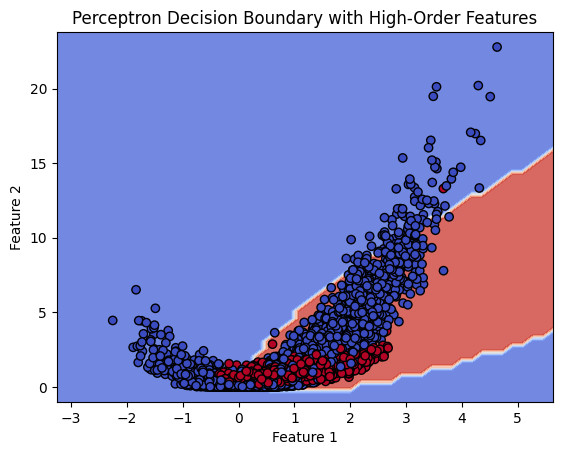

Epoch 1/10: Weights: [ 1.55586902 -0.42384514 -0.81962162  1.56523542 -0.40196091], Bias: -0.6
Epoch 2/10: Weights: [ 0.79146229  0.20653921 -0.29532061  0.42368826 -0.16635754], Bias: -0.4
Epoch 3/10: Weights: [ 0.853148   -0.01420012 -0.35982141  0.51512955 -0.11386961], Bias: -0.30000000000000004
Epoch 4/10: Weights: [ 0.70941323  0.05401401 -0.35757072  0.43301973 -0.10964351], Bias: -0.30000000000000004
Epoch 5/10: Weights: [ 0.68093123  0.11239764 -0.32626724  0.38174062 -0.13678792], Bias: -0.30000000000000004
Epoch 6/10: Weights: [ 0.76146621  0.14125249 -0.3085751   0.37440893 -0.20759087], Bias: -0.4
Epoch 7/10: Weights: [ 0.92476065  0.17342432 -0.37547663  0.37235277 -0.15542942], Bias: -0.30000000000000004
Epoch 8/10: Weights: [ 0.75789835  0.19967452 -0.26888648  0.35992885 -0.11714373], Bias: -0.4
Epoch 9/10: Weights: [ 0.75177829  0.11487166 -0.30594597  0.37414221 -0.1283791 ], Bias: -0.4
Epoch 10/10: Weights: [ 0.82947337  0.11529627 -0.31949203  0.3257619  -0.1008323

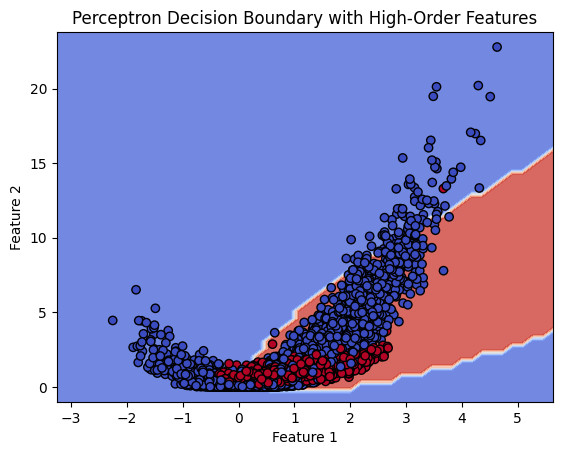

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  
perceptron = Perceptron(input_size=X_poly.shape[1])
perceptron.train(X_poly, y)
print(f"Accuracy: {perceptron.evaluate(X_poly, y):.2f}")
plot_decision_boundary(perceptron, X_poly, y)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return (x >= 0).astype(int)

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return self.activation_function(linear_output)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                inputs = X[i, :]
                prediction = self.predict(inputs)
                error = y[i] - prediction
                # Updating weights and bias using steepest descent
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            print(f"Epoch {epoch + 1}/{self.epochs}: Weights: {self.weights}, Bias: {self.bias}")

    def evaluate(self, X, y):
        predictions = np.array([self.predict(i) for i in X])
        correct = np.sum(predictions == y)
        return correct / len(y)

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
    grid = poly.transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Perceptron Decision Boundary with High-Order Features")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    
#initializing with high order features
perceptron = Perceptron(input_size=X_poly.shape[1])
#training it on high order features
perceptron.train(X_poly, y)
print(f"Accuracy: {perceptron.evaluate(X_poly, y):.2f}")

plot_decision_boundary(perceptron, X_poly, y)



This code implements a Perceptron that:

Trains on high-order polynomial features (e.g., quadratic combinations of original features).

Uses steepest descent to update weights and bias based on errors during training.

Evaluates its performance using accuracy on the dataset.

Visualizes the decision boundary showing how it separates different classes in the feature space.










In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


## Generating and Visualizing Synthetic Dataset

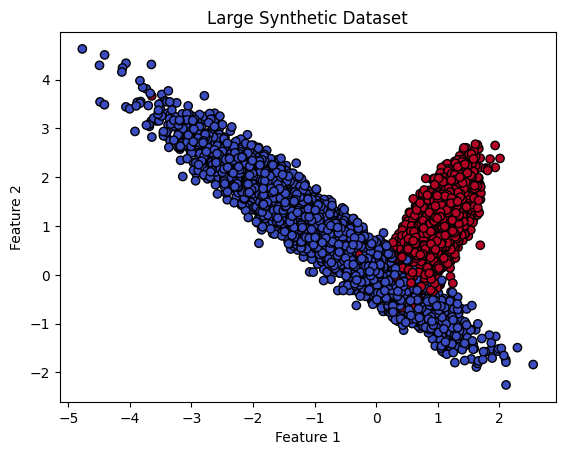

In [12]:
X, y = make_classification(
    n_samples=10000,  
    n_features=2,    
    n_informative=2, 
    n_redundant=0,   
    n_clusters_per_class=1,  
    random_state=42  
)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("Large Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Train SVM model with RBF kernal

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(random_state=42)

## Make Predictions and Evaluate the Model

In [14]:
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"SVM with RBF Kernel - Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"SVM with RBF Kernel - Testing Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


SVM with RBF Kernel - Training Accuracy: 98.24%
SVM with RBF Kernel - Testing Accuracy: 98.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       958
           1       0.99      0.99      0.99      1042

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## Visualize SVM Decision Boundary

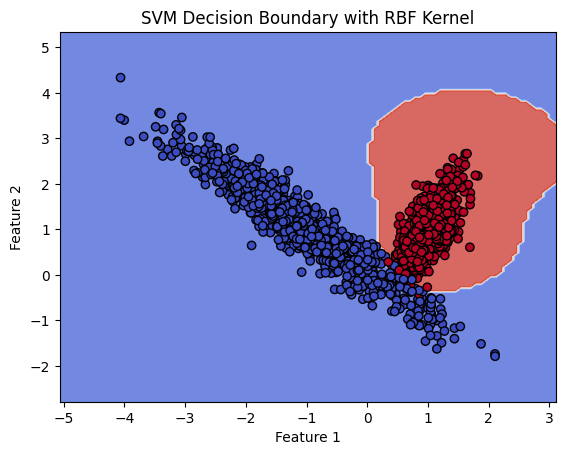

In [15]:
def plot_decision_boundary_svm(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("SVM Decision Boundary with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary_svm(svm_model, X_test, y_test)
